<font color='Blue'><h1><center>Maintainence Cost Reduction</center></h1></font>
<font color='Blue'><h1><left>Problem Statement:</left></h1></font> 

<font color='brown'><p style="font-size:1vw;">Building a predictive model using machine learning to predict the probability of a device failure.</p></font>

<font color='Blue'><h1><left>Business Overview:</left></h1></font>
  
<font color='brown'><p style="font-size:1vw;">A company has a fleet of devices transmitting daily telemetry readings. They would like to create a predictive
maintenance solution to proactively identify when maintenance should be performed. This approach promises cost
savings over routine or time-based preventive maintenance, because tasks are performed only when warranted.
</p></font>  


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Reading-and-Inspecting-the-Data" data-toc-modified-id="Reading-and-Inspecting-the-Data"><span class="toc-item-num">2&nbsp;&nbsp;</span>Reading and Inspecting theData</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Splitting-the-Data-into-Test-&amp;-Train-Split" data-toc-modified-id="Splitting-the-Data-into-Test-&amp;-Train-Split"><span class="toc-item-num">4&nbsp;&nbsp;</span>Splitting the Data into Test &amp; Train Split data</a></span></li><li><span><a href="#Apply-Standard-Scalling" data-toc-modified-id="Apply-Standard-Scalling"><span class="toc-item-num">5&nbsp;&nbsp;</span>Apply Standard Scalling</a></span></li><li><span><a href="#Treat-Skewness-of-Variables" data-toc-modified-id="Treat-Skewness-of-Variables-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Treat Skewness of Variables</a></span></li><li><span><a href="#Summary-from-EDA" data-toc-modified-id="Summary-from-EDA-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Summary from EDA</a></span></li><li><span><a href="#Model-Building" data-toc-modified-id="Model-Building"><span class="toc-item-num">8&nbsp;&nbsp;</span>Model Building</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary"><span class="toc-item-num">9&nbsp;&nbsp;</span>Summary

## Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 500)

import math
from sklearn import metrics
import itertools
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer
StdScaler = StandardScaler()
Pt = PowerTransformer()

from sklearn import model_selection
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score, StratifiedKFold, RandomizedSearchCV

#from imblearn import under_sampling
from imblearn.under_sampling import RandomUnderSampler
#from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler,SMOTE,ADASYN
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn import linear_model #import the package
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading and Inspecting the Data

In [2]:
df = pd.read_csv('predictive_maintenance.csv')
df.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/15,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,1/1/15,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/15,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/15,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/15,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [3]:
# Checking Duplicates

duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

           date    device  failure    metric1  metric2  metric3  metric4  \
101335  7/10/15  S1F0R4Q8        0  192721392        0        0        0   

        metric5  metric6  metric7  metric8  metric9  
101335        8   213700        0        0        0  


In [4]:
# Checking Missing Values

df.isnull().sum()

date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
dtype: int64

There is no missing values in the dataset

In [5]:
# Inspecting the Dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
date       124494 non-null object
device     124494 non-null object
failure    124494 non-null int64
metric1    124494 non-null int64
metric2    124494 non-null int64
metric3    124494 non-null int64
metric4    124494 non-null int64
metric5    124494 non-null int64
metric6    124494 non-null int64
metric7    124494 non-null int64
metric8    124494 non-null int64
metric9    124494 non-null int64
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [6]:
# Viewing the distribution of data

df.describe()

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223881e+08,159.484762,9.940455,1.741120,14.222669,260172.657726,0.292528,0.292528,12.451524
std,0.029167,7.045933e+07,2179.657730,185.747321,22.908507,15.943028,99151.078547,7.436924,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.128476e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227974e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833096e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [7]:
df.metric2.value_counts()

0        118110
2344        281
8           260
24          254
40          201
          ...  
3288          1
3352          1
3800          1
21200         1
44232         1
Name: metric2, Length: 558, dtype: int64

In [8]:
df.metric2.value_counts()

0        118110
2344        281
8           260
24          254
40          201
          ...  
3288          1
3352          1
3800          1
21200         1
44232         1
Name: metric2, Length: 558, dtype: int64

<font color='Blue'>
We can observe Metric 1 and Metric 6 has high magnitude compare with rest of the metrics, so scaling these features are important.

## Exploratory Data Analysis

<font color='Brown'>

Performing Univariate Analysis to view the outliers present in the metrics

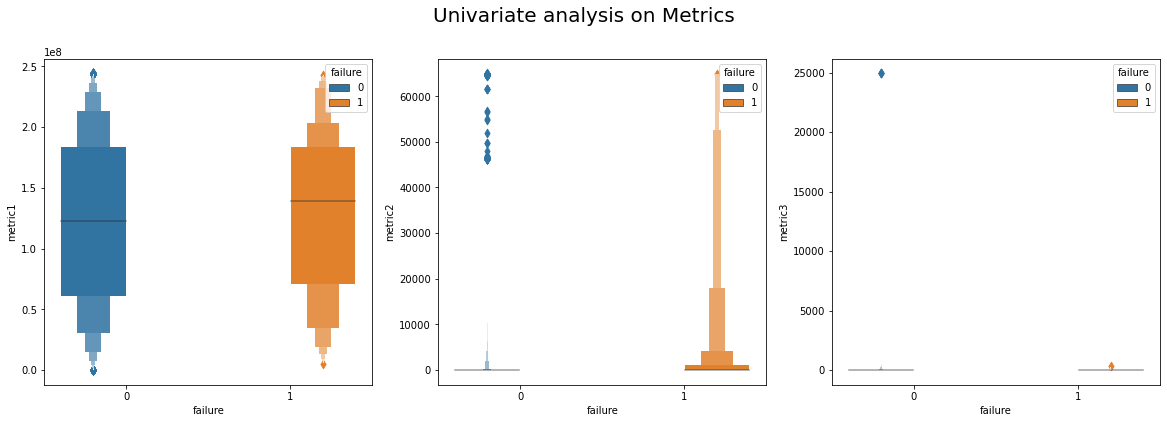

In [9]:
fig = plt.figure(figsize=(20, 6)) 

plt.subplot(131)
sns.boxenplot(x ='failure', y = 'metric1', hue ='failure' , data = df)

plt.subplot(132)
sns.boxenplot(x ='failure', y = 'metric2', hue ='failure' , data = df)

plt.subplot(133)
sns.boxenplot(x ='failure', y = 'metric3', hue ='failure' , data = df)

fig.suptitle('Univariate analysis on Metrics',fontsize=20,x =0.5, y=1)

plt.show()

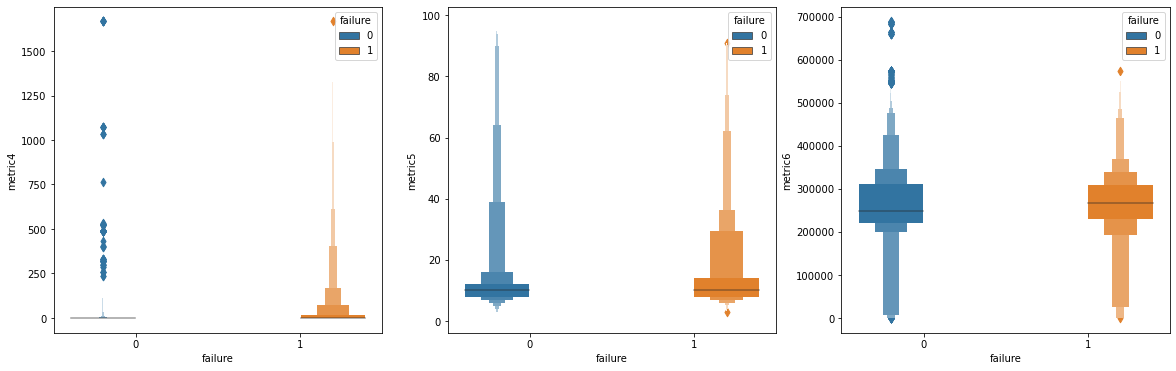

In [10]:
fig = plt.figure(figsize=(20, 6)) 

plt.subplot(131)
sns.boxenplot(x ='failure', y = 'metric4', hue ='failure' , data = df)

plt.subplot(132)
sns.boxenplot(x ='failure', y = 'metric5', hue ='failure' , data = df)

plt.subplot(133)
sns.boxenplot(x ='failure', y = 'metric6', hue ='failure' , data = df)

plt.show()

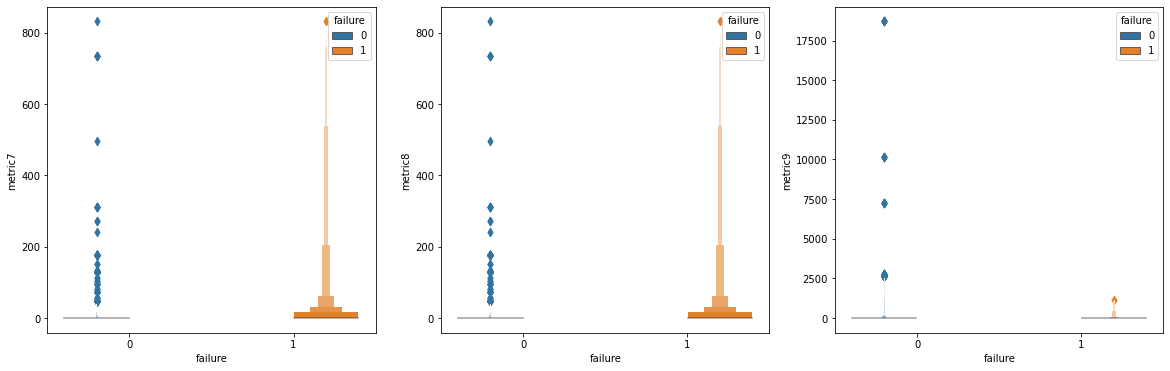

In [11]:
fig = plt.figure(figsize=(20, 6)) 

plt.subplot(131)
sns.boxenplot(x ='failure', y = 'metric7', hue ='failure' , data = df)

plt.subplot(132)
sns.boxenplot(x ='failure', y = 'metric8', hue ='failure' , data = df)

plt.subplot(133)
sns.boxenplot(x ='failure', y = 'metric9', hue ='failure' , data = df)

plt.show()

We can see lot of outliers in most of the metrics. So we will be handling the Oulier Treatment further.

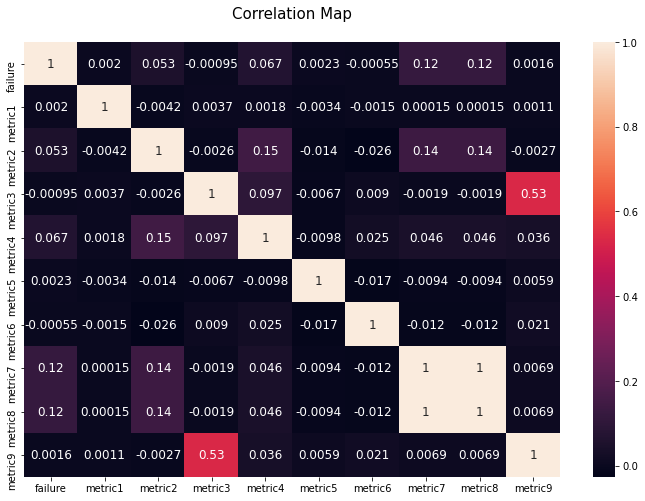

In [12]:
# Checking the Correlation between the Features

plt.figure(figsize = (12,8))
sns.heatmap(df.corr(),annot=True,annot_kws={"size": 12})
plt.title('Correlation Map\n',fontsize = 15)
plt.show()

We can see clearly see Metric 7 and Metric 8 and highly correlated. So we can keep only one metric justifying further.

In [13]:
#Checking the distribution of Metrics

#Creating the new dataframe to see distribution of metrics

df_metrics = df.drop(labels = ['date','device','failure'],axis = 1).copy()

df_metrics.head()

,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,215630672,56,0,52,6,407438,0,0,7
1,61370680,0,3,0,6,403174,0,0,0
2,173295968,0,0,0,12,237394,0,0,0
3,79694024,0,0,0,6,410186,0,0,0
4,135970480,0,0,0,15,313173,0,0,3


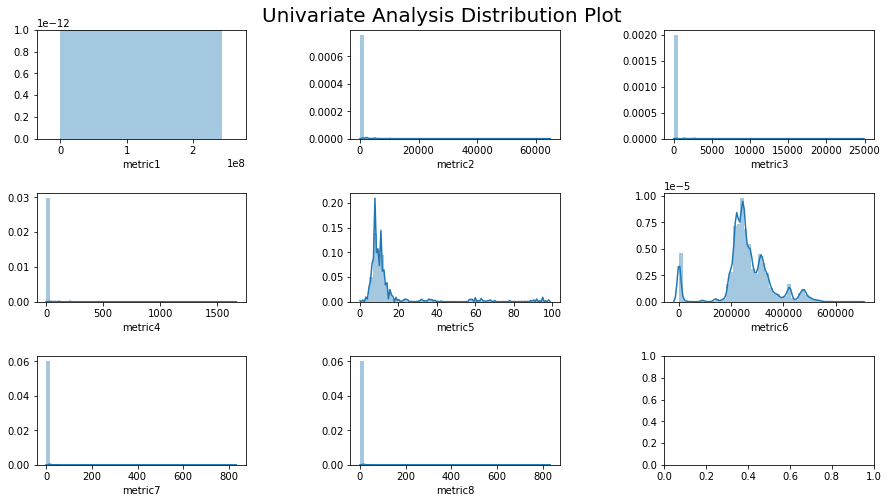

In [14]:
fig,axes = plt.subplots(3,3,figsize=(15,8))
count = 0
for i in df_metrics.columns[:-1]:
    ax = axes[count//3, count%3]
    sns.distplot(df_metrics[i], ax=ax)
    count+=1
fig.suptitle('Univariate Analysis Distribution Plot', fontsize = 20,x =0.5, y=0.92)
fig.subplots_adjust(wspace=0.5,hspace=0.5 ) 
plt.show()

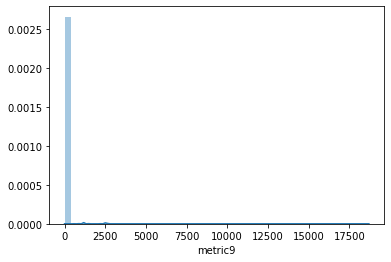

In [15]:
sns.distplot(df_metrics['metric9'])
plt.show()

It is clearly visible that there is skweness in the data.

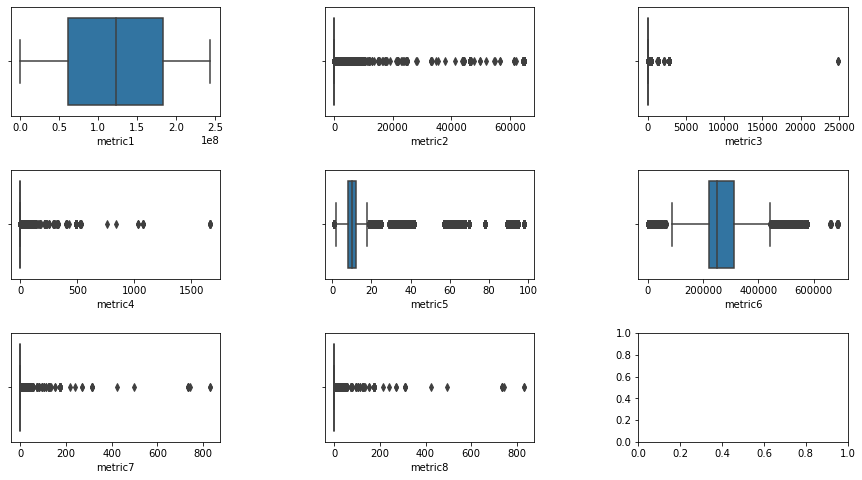

In [16]:
fig,axes = plt.subplots(3,3,figsize=(15,8))
count = 0
for i in df_metrics.columns[:-1]:
    ax = axes[count//3, count%3]
    sns.boxplot(df_metrics[i], ax=ax)
    count+=1
fig.subplots_adjust(wspace=0.5,hspace=0.5 ) 
plt.show()

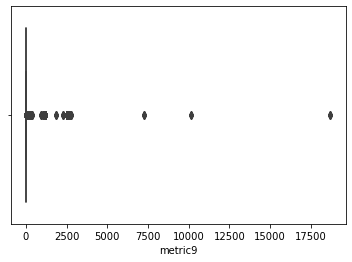

In [17]:
sns.boxplot(df_metrics['metric9'])
plt.show()

### Performing Outlier Treatment

In [18]:
# Defining function for filtering outliers

def filter_OutLiers(df,column_name):
    Q1 = df[column_name].quantile(0.05)
    Q3 = df[column_name].quantile(0.95)
    IQR = Q3 - Q1
    df_temp = df.loc[((df[column_name] >= (Q1 - 1.5 * IQR)) & (df[column_name] <= (Q3 + 1.5 * IQR)))]
    return(df_temp)

In [19]:
# Outliers treatment on df_leads numerical variables
for i in df_metrics[0:]:
    df = filter_OutLiers(df,i).copy()
df.shape

(106225, 12)

In [20]:
df_metrics = df.drop(labels = ['date','device','failure'],axis = 1).copy()

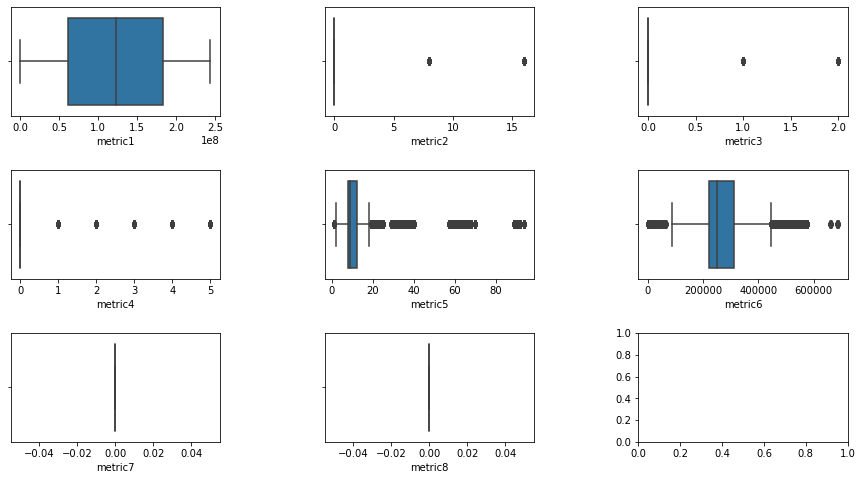

In [21]:
fig,axes = plt.subplots(3,3,figsize=(15,8))
count = 0
for i in df_metrics.columns[:-1]:
    ax = axes[count//3, count%3]
    sns.boxplot(df_metrics[i], ax=ax)
    count+=1
fig.subplots_adjust(wspace=0.5,hspace=0.5 ) 
plt.show()

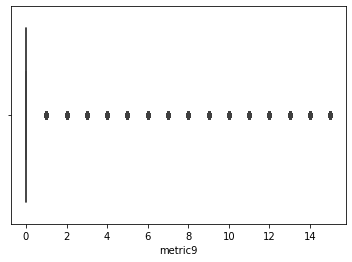

In [22]:
sns.boxplot(df_metrics['metric9'])
plt.show()

In [23]:
df.describe()

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
count,106225.000000,1.062250e+05,106225.000000,106225.000000,106225.000000,106225.000000,106225.000000,106225.0,106225.0,106225.000000
mean,0.000245,1.223594e+08,0.038861,0.024768,0.038202,13.529037,261534.894865,0.0,0.0,0.576729
std,0.015643,7.042714e+07,0.698370,0.175396,0.345432,14.494294,99315.159139,0.0,0.0,1.817211
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.0,0.0,0.000000
25%,0.000000,6.129916e+07,0.000000,0.000000,0.000000,8.000000,221423.000000,0.0,0.0,0.000000
50%,0.000000,1.226797e+08,0.000000,0.000000,0.000000,9.000000,249179.000000,0.0,0.0,0.000000
75%,0.000000,1.833257e+08,0.000000,0.000000,0.000000,12.000000,310504.000000,0.0,0.0,0.000000
max,1.000000,2.441386e+08,16.000000,2.000000,5.000000,94.000000,689161.000000,0.0,0.0,15.000000


<font color='Red'>
    
Even after removing Statiscal Outliers, we can see high level of outliers in Metric2, Metric3, Metric4 and Metric9. Also, 25,50,75 and 100% of these values are zeros. So these are not useful in the model building.

Note: Without Removing these metrics Model were built, but these models are proned to Overfitting depite of any Hyperparamters

## Splitting the Data into Test & Train Split

In [24]:
y= df['failure'] #class variable
X = df.drop(labels =['date','device','failure'], axis=1)

**As we noticed, dataset is highly imbalanced, so let’s use ‘Stratify’ options for target variable to make sure equal amount of classes distribution in Train and Test sets.**

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)

In [26]:
print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (79668, 9)
X_test Shape:  (26557, 9)
y_train Shape:  (79668,)
y_test Shape:  (26557,)


## Apply Standard Scalling

In [27]:
X_train = StdScaler.fit_transform(X_train)
X_test=StdScaler.transform(X_test)

## Treat Skewness of Variables

In [28]:
#Apply Power transaformer to moderate the skewness of the all variables 

X_train_pt = pd.DataFrame(Pt.fit_transform(X_train))
X_test_pt = pd.DataFrame(Pt.transform(X_test))

In [29]:
#apply column names after power transformer

X_train_pt.columns = df_metrics.columns
X_test_pt.columns = df_metrics.columns

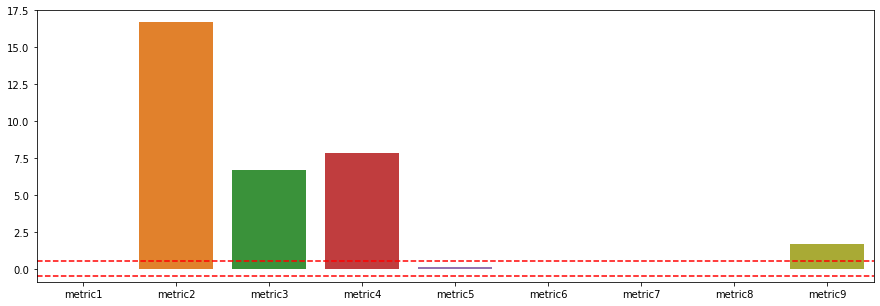

In [30]:
plt.figure(figsize=(15,5))
sns.barplot(y = X_train_pt.skew().values, x = X_train_pt.skew().index)
plt.axhline(y=0.5, color='r',linestyle='--') # acceptable upper skew value
plt.axhline(y=-0.5, color='r',linestyle='--') # acceptable lower skew value
plt.show()

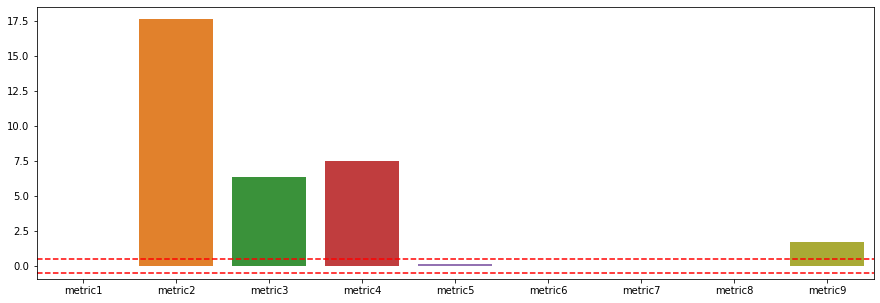

In [31]:
plt.figure(figsize=(15,5))
sns.barplot(y = X_test_pt.skew().values, x = X_test_pt.skew().index)
plt.axhline(y=0.5, color='r',linestyle='--') # acceptable upper skew value
plt.axhline(y=-0.5, color='r',linestyle='--') # acceptable lower skew value
plt.show()

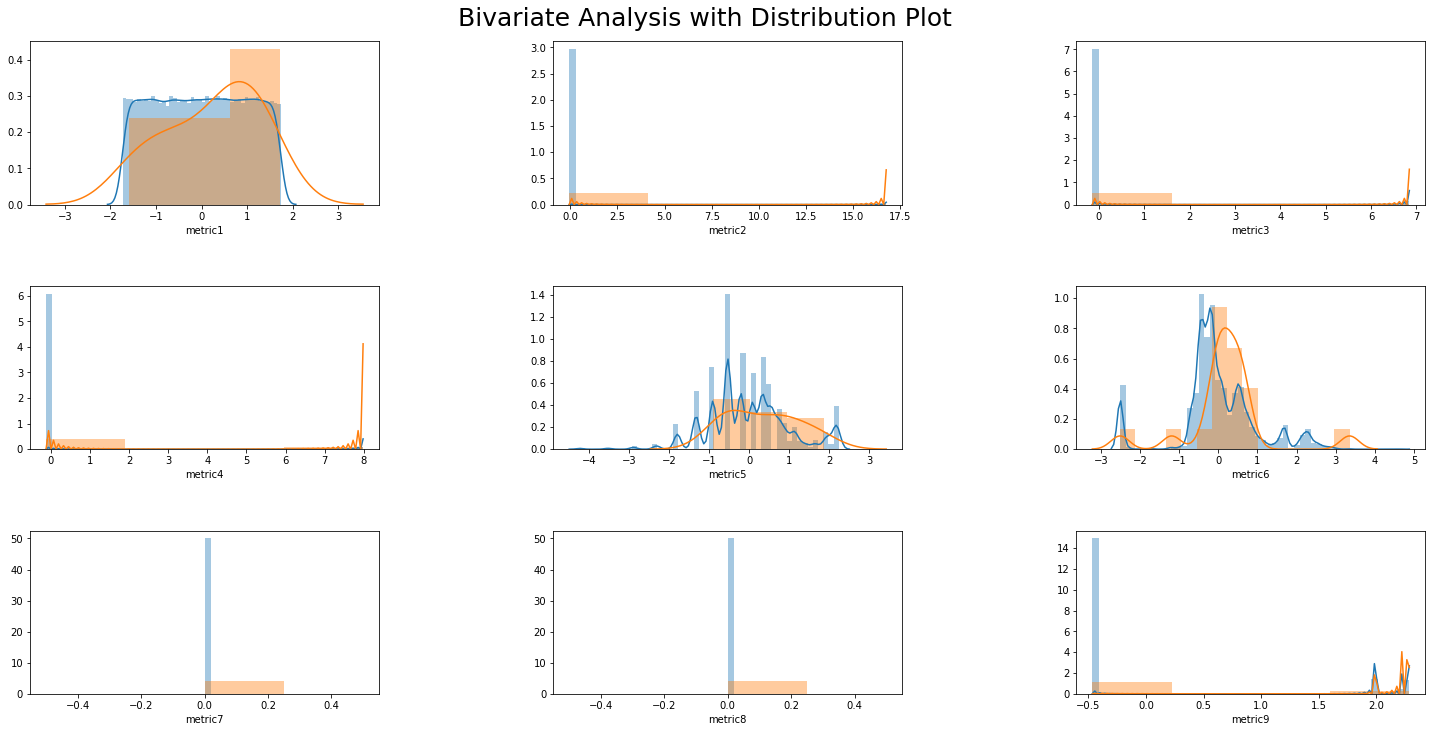

In [32]:
df_plot_temp = X_train_pt.copy()
df_plot_temp['failure'] = y_train.values

fig,axes = plt.subplots(3,3,figsize=(25,12))
count = 0
for i in df_plot_temp.columns[:-1]:
    df_1 = df_plot_temp.loc[df_plot_temp['failure']==1]
    df_0 = df_plot_temp.loc[df_plot_temp['failure']==0]
    ax = axes[count//3, count%3]
    sns.distplot(df_0[i], ax=ax)
    sns.distplot(df_1[i], ax=ax)
    count+=1
fig.suptitle('Bivariate Analysis with Distribution Plot', fontsize = 25,x =0.5, y=0.92)
fig.subplots_adjust(wspace=0.5,hspace=0.5 ) 
plt.show()

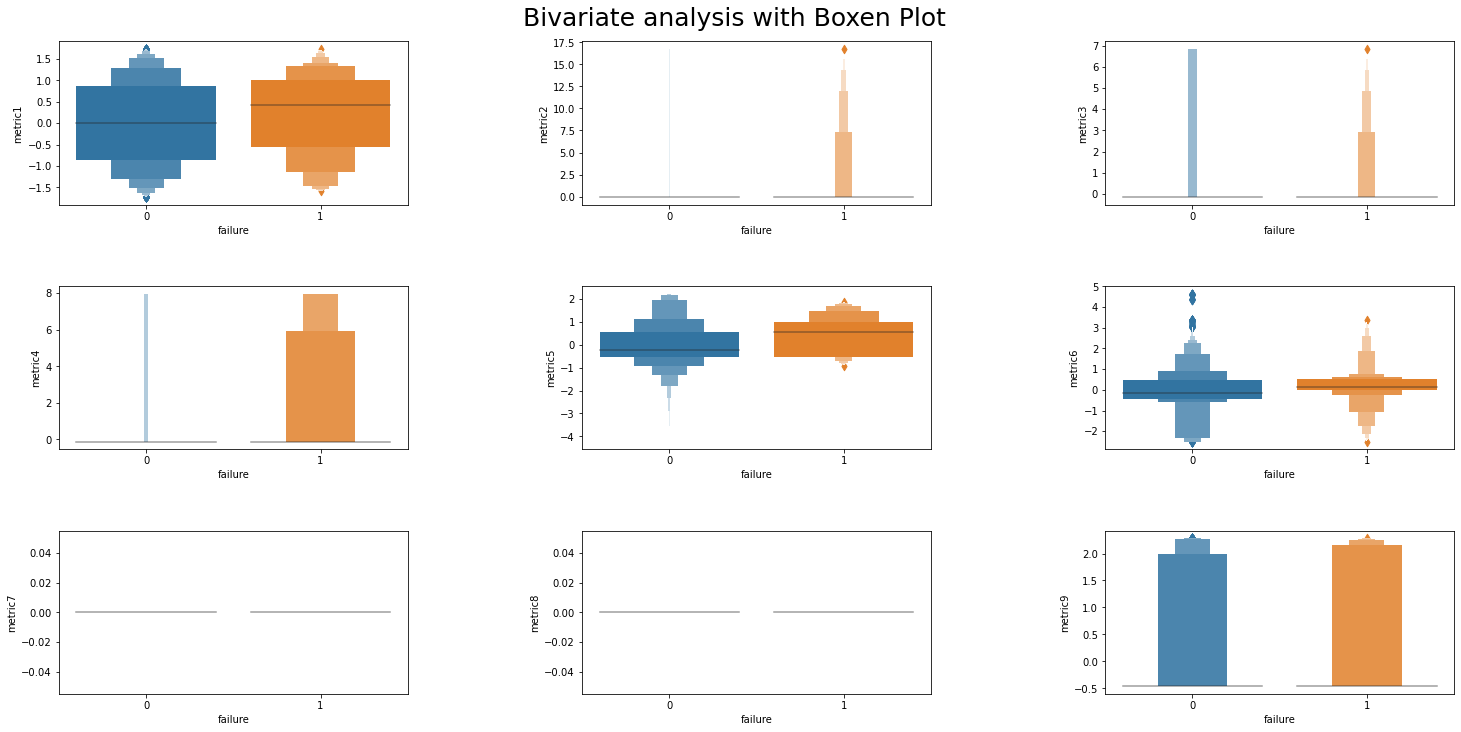

In [33]:
df_plot_temp = X_train_pt.copy()
df_plot_temp['failure'] = y_train.values

fig,axes = plt.subplots(3,3,figsize=(25,12))
count = 0
for i in df_plot_temp.columns[:-1]:
    df_1 = df_plot_temp.loc[df_plot_temp['failure']==1]
    df_0 = df_plot_temp.loc[df_plot_temp['failure']==0]
    ax = axes[count//3, count%3]
    sns.boxenplot(y = i, data = df_plot_temp, ax=ax, x = 'failure')
    count+=1
fig.suptitle('Bivariate analysis with Boxen Plot', fontsize = 25,x =0.5, y=0.92)
fig.subplots_adjust(wspace=0.5,hspace=0.5 ) 
plt.show()

From the above Bivariate Analysis, it is clear that metrics 1, 5, 7, 8 are less significant. Also metric 7 and 8 are highly corrleated, we should keep only one variable to overcome Multicollinearity. As it is also evident that they are less significant from bivariate analysis, we can drop these variables.

In [34]:
#Droping the less significant features

X_train_res = X_train_pt.drop(labels = ['metric2','metric3','metric4','metric7','metric8','metric9'],axis=1).copy()
X_test_res = X_test_pt.drop(labels = ['metric2','metric3','metric4','metric7','metric8','metric9'],axis=1).copy()

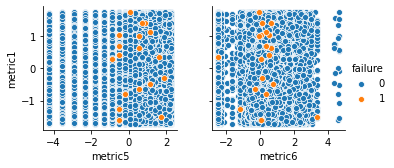

In [35]:
#Scatterplot of Metrics with respect to 'Failure'

df_plot_final = X_train_res.copy()
df_plot_final['failure'] = y_train.values

pairplot_cols_lst = df_plot_final.columns[:-1].tolist()
y_pair_col = pairplot_cols_lst.pop(0)
range_lst = list(range(0,len(pairplot_cols_lst)+6,6));
for i in range(1,len(range_lst)):
    sns.pairplot(data=df_plot_final,x_vars=pairplot_cols_lst[range_lst[max(0,(i-1))]:range_lst[i]],y_vars=y_pair_col,
                 hue='failure')

#### It is clear that metric2, metric3, metric4 are Categorical Variables from the visualization.

In [36]:
df['failure'].value_counts()

0    106199
1        26
Name: failure, dtype: int64

## Summary from EDA

* **High-class imbalance (Out of a total of 1,06,199 records, 26 were fraudulent)**
    * ***99.97% is normal and 0.03% is failure.***
    * ***Needed to use class imbalance techniques like Random oversampling, SMOTE and ADASYN.***
    * ***The appropriate metric for the best model is ROC-AUC.***


* **List of models can try to get the best model:**
    * ***`Logistic regression`:Might not helpful since the data is not much linearly separable, but we can experiment to check the model results.***
    * ***`K-Nearest Neighbor`:Need a lot of computation, not recommended for large datasets, but try once to see the performance.***
    * ***`Support vector machine`:Need a lot of computation, not recommended for large datasets, but try once to see the performance.***
    * ***`Decision tree`:chances are high to get overfit, but with proper tunings possibly can get good model and with ensemble of decision trees will give even better results.***
    * ***`Random forest`:This is ensembles of decision trees with an iterative way of adding weak learners to form the final model, expecting best results from this classification model.***
    * ***`XGBoost`:Fast in learning, because of parallel processing. This works on reducing loss function. And an extended version of gradient boosting. Expecting best results from this classification as well.***
    
    

* **Hyperparameters tuning:**
    * ***Use `GridSearchCV` or `RandomSearchCV` with StratifiedKFold, to find the best hyperparameters for the model.***
        * ***`RandomSearchCV` is the best option when we have a large dataset, but not guaranteed the best results.***
        * ***Prefer `StratifiedKFold` over `K-Fold`, especially in such a case of imbalanced data stratification ensures that each fold is representative of all the strata of the data.***

##  Data Balancing

**We can Perform data balancing with below techniques:**  
- Random Oversampling
- SMOTE
- ADASYN

### Random Oversampling

In [37]:
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train_res, y_train)
X_test_ros, y_test_ros = ros.fit_resample(X_test_res, y_test)

In [38]:
print('Ramdom oversampling X_train shape:\t', X_train_ros.shape)
print('Ramdom oversampling y_train shape:\t', y_train_ros.shape)
print('X_test shape:\t\t\t\t', X_test_ros.shape)
print('y_test shape:\t\t\t\t', y_test_ros.shape)

Ramdom oversampling X_train shape:	 (159298, 3)
Ramdom oversampling y_train shape:	 (159298,)
X_test shape:				 (53100, 3)
y_test shape:				 (53100,)


In [39]:
y_train_ros.value_counts()

1    79649
0    79649
Name: failure, dtype: int64

#### Final Data Frames for Model Building after scaling, removal of Skewness and balancing the data

In [40]:
X_train_ros.head(5)

,metric1,metric5,metric6
0,-0.265520,0.326886,-0.427819
1,-1.513400,-0.538632,-0.021123
2,0.223040,-0.210907,-0.143917
3,-0.247534,-0.909810,0.181630
4,0.660596,2.237252,-0.232186


In [41]:
y_train_ros.value_counts()

1    79649
0    79649
Name: failure, dtype: int64

In [42]:
X_test_ros.head(5)

,metric1,metric5,metric6
0,-1.382285,-0.538632,-0.429008
1,-1.529631,1.131386,0.740604
2,-0.601752,0.076561,1.542630
3,1.116438,-0.909810,-0.057901
4,0.088783,-0.538632,-0.497594


In [43]:
y_test_ros.value_counts()

1    26550
0    26550
Name: failure, dtype: int64



## Model Building

### 1. Logistic Regression

In [44]:
lg_params = {'C':np.arange(0.0001, 1, 0.02),'max_iter':range(50,300,50)}

lg = LogisticRegression(random_state=42, n_jobs=-1)

# Cross validation

lg_model_cv = RandomizedSearchCV(lg,param_distributions=lg_params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

lg_model_cv.fit(X_train_ros,y_train_ros)

lg_cv_results = pd.DataFrame(lg_model_cv.cv_results_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    7.7s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    7.9s finished


In [45]:
lg_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_iter,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.269345,0.005243,0.016345,0.002386,50,0.4001,"{'max_iter': 50, 'C': 0.4001}",0.641109,0.639503,0.637931,0.636824,0.640493,0.639172,0.001591,2
1,0.278670,0.022219,0.018250,0.001126,200,0.0201,"{'max_iter': 200, 'C': 0.0201}",0.641116,0.639493,0.637932,0.636834,0.640486,0.639172,0.001588,1
2,0.286391,0.035208,0.018050,0.001187,200,0.7201,"{'max_iter': 200, 'C': 0.7201}",0.641106,0.639503,0.637931,0.636827,0.640493,0.639172,0.001590,3
3,0.270245,0.020632,0.016543,0.002818,250,0.0401,"{'max_iter': 250, 'C': 0.040100000000000004}",0.641109,0.639493,0.637925,0.636824,0.640490,0.639168,0.001591,5
4,0.230307,0.048937,0.022057,0.007311,100,0.1401,"{'max_iter': 100, 'C': 0.1401}",0.641109,0.639506,0.637925,0.636824,0.640490,0.639171,0.001592,4


In [46]:
# check for the best estimator

lg_model_cv.best_estimator_

LogisticRegression(C=0.0201, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [47]:
# fit the model using best estimator 

C = lg_model_cv.best_estimator_.C
logit = LogisticRegression(C=C)

logit.fit(X_train_ros, y_train_ros)
logit.coef_

array([[0.25837966, 0.37277338, 0.1701662 ]])

In [48]:
# check the prediction with train set
y_train_pred = logit.predict_proba(X_train_ros)[:,1]
y_train_pred

array([0.46703335, 0.33005828, 0.46058482, ..., 0.58960795, 0.58365009,
       0.58365009])

In [49]:
# create a data frame with target variable and probabilities
y_train_pred_prob = pd.DataFrame({'Failure':y_train_ros.values, 'Failure_Prob':y_train_pred})
y_train_pred_prob.head()

,Failure,Failure_Prob
0,0,0.467033
1,0,0.330058
2,0,0.460585
3,0,0.381140
4,0,0.701124


In [50]:
# Creating new columns 'Failure_Pred' by using 'Failure_Prob' values. 1 if churn_user_Prob > 0.5 else 0

y_train_pred_prob['Failure_Pred'] = y_train_pred_prob.Failure_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_prob.head()

,Failure,Failure_Prob,Failure_Pred
0,0,0.467033,0
1,0,0.330058,0
2,0,0.460585,0
3,0,0.381140,0
4,0,0.701124,1


In [51]:
# Check the distribution of probability, should be with in 0-1

y_train_pred_prob['Failure_Prob'].describe()

count    159298.000000
mean          0.500000
std           0.114837
min           0.094772
25%           0.415661
50%           0.493619
75%           0.585824
max           0.840794
Name: Failure_Prob, dtype: float64

In [52]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score

In [53]:
# Classification report

print(classification_report(y_train_pred_prob.Failure,y_train_pred_prob.Failure_Pred)) 

              precision    recall  f1-score   support

           0       0.59      0.60      0.59     79649
           1       0.59      0.58      0.59     79649

    accuracy                           0.59    159298
   macro avg       0.59      0.59      0.59    159298
weighted avg       0.59      0.59      0.59    159298



In [54]:
# Function to plot the confusion matrix

def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [55]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_prob.Failure, y_train_pred_prob.Failure_Pred )
print(confusion)

[[47851 31798]
 [33381 46268]]


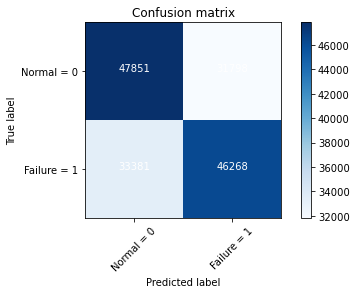

In [56]:
# Plot confusion matrix

fig = figsize=(20,8)
plt.figure()
plot_confusion_matrix(confusion, classes=['Normal = 0','Failure = 1'],normalize= False,  title='Confusion matrix')

In [57]:
def confusion_matrix(confusion, actual_target, predicted_target):
    
    print(confusion,'\n')
 
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    
    print('Sensitivity (or) Recall score :', (TP / float(TP+FN)).round(2))
    print('Specificity:', (TN / float(TN+FP)).round(2))
    print('roc_auc_score:',roc_auc_score(actual_target, predicted_target).round(2))
    print('accuracy_score:',accuracy_score(actual_target, predicted_target).round(2))

In [58]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_prob.Failure, y_train_pred_prob.Failure_Pred )

#confusion_matrix(confusion, actual_target, predicted_target):
confusion_matrix(confusion,y_train_pred_prob.Failure,y_train_pred_prob.Failure_Pred)

[[47851 31798]
 [33381 46268]] 

Sensitivity (or) Recall score : 0.58
Specificity: 0.6
roc_auc_score: 0.59
accuracy_score: 0.59


### Try to find Optimal probabaility Cutoff

In [59]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_prob[i]= y_train_pred_prob.Failure_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_prob.head()

,Failure,Failure_Prob,Failure_Pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.467033,0,1,1,1,1,1,0,0,0,0,0
1,0,0.330058,0,1,1,1,1,0,0,0,0,0,0
2,0,0.460585,0,1,1,1,1,1,0,0,0,0,0
3,0,0.381140,0,1,1,1,1,0,0,0,0,0,0
4,0,0.701124,1,1,1,1,1,1,1,1,1,0,0


In [60]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_prob.Failure, y_train_pred_prob[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.500050  1.000000  0.000100
0.2   0.2  0.502367  1.000000  0.004733
0.3   0.3  0.529103  1.000000  0.058205
0.4   0.4  0.588790  0.894788  0.282791
0.5   0.5  0.590836  0.580899  0.600773
0.6   0.6  0.556680  0.265565  0.847795
0.7   0.7  0.485631  0.000000  0.971261
0.8   0.8  0.499944  0.000000  0.999887
0.9   0.9  0.500000  0.000000  1.000000


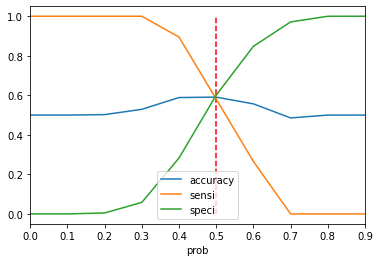

In [61]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.5, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

#### Optimal Probability Cutoff: 0.5

In [62]:
# test set evaluation
y_test_pred = lg_model_cv.predict_proba(X_test_ros)[:,1]
y_test_pred

array([0.32224972, 0.51000949, 0.50576372, ..., 0.69704598, 0.45198933,
       0.45198933])

In [63]:
# Creating data frame with target variable and probabilities

y_test_pred_prob = pd.DataFrame({'Failure':y_test_ros.values, 'Failure_Prob':y_test_pred})

y_test_pred_prob.head()

,Failure,Failure_Prob
0,0,0.322250
1,0,0.510009
2,0,0.505764
3,0,0.456846
4,0,0.407326


In [64]:
# Create New columns 'Failure_Pred' by using 'Failure_Prob' values. 1 if churn_user_Prob > 0.5 else 0

y_test_pred_prob['Failure_Pred'] = y_test_pred_prob.Failure_Prob.map(lambda x: 1 if x > 0.49 else 0)

y_test_pred_prob.head()

,Failure,Failure_Prob,Failure_Pred
0,0,0.322250,0
1,0,0.510009,1
2,0,0.505764,1
3,0,0.456846,0
4,0,0.407326,0


In [65]:
# Checking the distribution of probability, should be with in 0-1

y_test_pred_prob['Failure_Prob'].describe()

count    53100.000000
mean         0.475786
std          0.114124
min          0.095810
25%          0.419961
50%          0.451989
75%          0.557196
max          0.808618
Name: Failure_Prob, dtype: float64

In [66]:
print(classification_report(y_test_pred_prob.Failure, y_test_pred_prob.Failure_Pred)) # check the classification report

              precision    recall  f1-score   support

           0       0.45      0.57      0.50     26550
           1       0.40      0.29      0.34     26550

    accuracy                           0.43     53100
   macro avg       0.42      0.43      0.42     53100
weighted avg       0.42      0.43      0.42     53100



In [67]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_prob.Failure, y_test_pred_prob.Failure_Pred )

#confusion_matrix(confusion, actual_target, predicted_target):
confusion_matrix(confusion,y_test_pred_prob.Failure, y_test_pred_prob.Failure_Pred)

[[15177 11373]
 [18855  7695]] 

Sensitivity (or) Recall score : 0.29
Specificity: 0.57
roc_auc_score: 0.43
accuracy_score: 0.43


In [68]:
y_test_ros.value_counts()

1    26550
0    26550
Name: failure, dtype: int64

In [69]:
data_dict = {'Model':['LG_Train','LG_Test'],'ROC_AUC':[0.59,0.43]}
result_df_0 = pd.DataFrame(data_dict)
result_df_0

,Model,ROC_AUC
0,LG_Train,0.59
1,LG_Test,0.43


<font color='Blue'>
We can see clear overifitting in the Logistic Regression Model. To overcome Overfitting, we should try out with Regularization but instead of applying regularization here we can try XGBOOST which is robust due to its parallelization and also includes regularized term.

# Random Forest

In [70]:
# RandomForestClassifier 
RFC = RandomForestClassifier(random_state=42, n_jobs=-1,bootstrap=False,criterion='entropy')
kfolds = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)

# Performing Cross Validation 
rfc_params = {'n_estimators':range(10,200,5),'max_depth':range(2,3),
              'ccp_alpha':list(np.arange(2e-5,5.5e-5,0.65e-5))}

rfc_model_cv = RandomizedSearchCV(estimator=RFC, param_distributions=rfc_params,n_iter=25, scoring='roc_auc', n_jobs=-1, 
                            cv=kfolds.split(X_train_ros,y_train_ros),verbose=1, return_train_score=True)
rfc_model_cv.fit(X_train_ros,y_train_ros)

rfc_cv_results = pd.DataFrame(rfc_model_cv.cv_results_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  2.9min finished


In [71]:
rfc_cv_results[['param_n_estimators','param_ccp_alpha','mean_test_score','rank_test_score','mean_train_score']]

,param_n_estimators,param_ccp_alpha,mean_test_score,rank_test_score,mean_train_score
0,120,5.25e-05,0.851072,14,0.851098
1,125,3.95e-05,0.851098,12,0.851124
2,115,3.95e-05,0.850110,20,0.850181
3,70,4.6e-05,0.850977,15,0.851000
4,125,2.65e-05,0.851098,12,0.851124
5,185,3.3e-05,0.853679,2,0.853726
6,15,5.25e-05,0.843547,23,0.843573
7,160,3.3e-05,0.852130,6,0.852206
8,195,4.6e-05,0.853653,4,0.853700
9,20,5.25e-05,0.844280,22,0.844305


In [72]:
# check for the best estimator
rfc_model_cv.best_estimator_

RandomForestClassifier(bootstrap=False, ccp_alpha=3.3e-05, class_weight=None,
                       criterion='entropy', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=175,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [73]:
RFC.set_params(**rfc_model_cv.best_estimator_.get_params())

RandomForestClassifier(bootstrap=False, ccp_alpha=3.3e-05, class_weight=None,
                       criterion='entropy', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=175,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [74]:
rfc_y_train_pred_prob = RFC.fit(X_train_ros, y_train_ros).predict_proba(X_train_ros)[:,1]
rfc_y_train_pred_prob

array([0.29057858, 0.52244739, 0.29057858, ..., 0.6656143 , 0.6656143 ,
       0.6656143 ])

In [75]:
rfc_y_test_pred_prob = RFC.predict_proba(X_test_ros)[:,1]
rfc_y_test_pred_prob

array([0.34433576, 0.52244739, 0.47508383, ..., 0.31154474, 0.34433576,
       0.34433576])

In [76]:
# check the prediction with train set

y_train_pred_rfc = rfc_model_cv.predict(X_train_ros)
y_train_pred_rfc

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [77]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred_rfc)

#confusion_matrix(confusion, actual_target, predicted_target):
confusion_matrix(confusion,y_train_ros, y_train_pred_rfc)

[[59410 20239]
 [12498 67151]] 

Sensitivity (or) Recall score : 0.84
Specificity: 0.75
roc_auc_score: 0.79
accuracy_score: 0.79


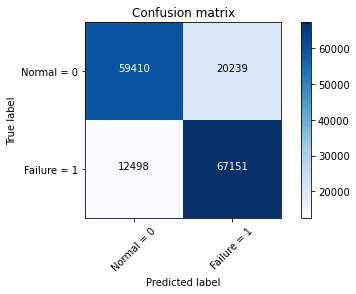

In [78]:
# Plot confusion matrix

fig = figsize=(20,8)
plt.figure()
plot_confusion_matrix(confusion, classes=['Normal = 0','Failure = 1'],normalize= False,  title='Confusion matrix')

In [79]:
# check the prediction with test set

y_test_pred_rfc = rfc_model_cv.predict(X_test_ros)
y_test_pred_rfc

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [80]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_ros, y_test_pred_rfc)

#confusion_matrix(confusion, actual_target, predicted_target):
confusion_matrix(confusion,y_test_ros, y_test_pred_rfc)

[[19815  6735]
 [15171 11379]] 

Sensitivity (or) Recall score : 0.43
Specificity: 0.75
roc_auc_score: 0.59
accuracy_score: 0.59


In [81]:
data_dict = {'Model':['RFC_Train','RFC_Test'],'ROC_AUC':[0.79,0.59]}
result_df_0 = pd.DataFrame(data_dict)
result_df_0

,Model,ROC_AUC
0,RFC_Train,0.79
1,RFC_Test,0.59


<font color='Blue'>
We are seeing the same issue of overfitting similar to Logistic Regression

# XGBOOST

In [82]:
#XGBClassifier
xgbc = XGBClassifier(random_state=42, n_jobs=-1,seed=42)
kfolds = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)

#perform cross validation 
xgbc_params = {'n_estimators':range(10,25,5),'max_depth':range(2,3),'min_child_weight':[0.2,0.4,0.6],
               'learning_rate':list(np.arange(0.005,0.3,0.005)),'gamma':list(np.arange(0.0,0.5,0.05)),
               'colsample_bytree':list(np.arange(0.1,1,0.01)),'subsample':list(np.arange(0.1,1.0,0.05))}

xgbc_model_cv = RandomizedSearchCV(estimator=xgbc, param_distributions=xgbc_params,n_iter=25, scoring='roc_auc', n_jobs=-1, 
                            cv=kfolds.split(X_train_ros,y_train_ros),verbose=1, return_train_score=True)
xgbc_model_cv.fit(X_train_ros,y_train_ros)

xgbc_cv_results = pd.DataFrame(xgbc_model_cv.cv_results_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   23.9s finished


In [83]:
xgbc_cv_results[['param_max_depth','param_n_estimators','mean_test_score','rank_test_score','mean_train_score']]

,param_max_depth,param_n_estimators,mean_test_score,rank_test_score,mean_train_score
0,2,10,0.865717,22,0.865829
1,2,10,0.899800,17,0.900199
2,2,20,0.918051,13,0.918186
3,2,20,0.908045,16,0.908173
4,2,15,0.954597,8,0.954837
5,2,20,0.943693,10,0.943941
6,2,20,0.959996,4,0.960029
7,2,10,0.889108,19,0.889172
8,2,10,0.855346,25,0.855631
9,2,20,0.911128,14,0.911294


In [84]:
# check for the best estimator
xgbc_model_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.13999999999999999,
              gamma=0.25, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.27, max_delta_step=0,
              max_depth=2, min_child_weight=0.4, missing=nan,
              monotone_constraints='()', n_estimators=20, n_jobs=-1,
              num_parallel_tree=1, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=0.7500000000000002, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [85]:
xgbc.set_params(**xgbc_model_cv.best_estimator_.get_params())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.13999999999999999,
              gamma=0.25, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.27, max_delta_step=0,
              max_depth=2, min_child_weight=0.4, missing=nan,
              monotone_constraints='()', n_estimators=20, n_jobs=-1,
              num_parallel_tree=1, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=0.7500000000000002, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [86]:
xgbc_y_train_pred_prob = xgbc.fit(X_train_ros, y_train_ros).predict_proba(X_train_ros)[:,1]
xgbc_y_train_pred_prob

array([0.06063703, 0.70941436, 0.09762417, ..., 0.73630935, 0.8190404 ,
       0.8190404 ], dtype=float32)

In [87]:
xgbc_y_test_pred_prob = xgbc.predict_proba(X_test_ros)[:,1]
xgbc_y_test_pred_prob

array([0.26479736, 0.78205293, 0.2837856 , ..., 0.05035188, 0.13755614,
       0.13755614], dtype=float32)

In [88]:
# check the prediction with train set

y_train_pred_xgb = xgbc_model_cv.predict(X_train_ros)
y_train_pred_xgb

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [89]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred_xgb)

#confusion_matrix(confusion, actual_target, predicted_target):
confusion_matrix(confusion,y_train_ros, y_train_pred_xgb)

[[66841 12808]
 [    0 79649]] 

Sensitivity (or) Recall score : 1.0
Specificity: 0.84
roc_auc_score: 0.92
accuracy_score: 0.92


In [90]:
# check the prediction with test set

y_test_pred_xgb = xgbc_model_cv.predict(X_test_ros)
y_test_pred_xgb

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [91]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_ros, y_test_pred_xgb)

#confusion_matrix(confusion, actual_target, predicted_target):
confusion_matrix(confusion,y_test_ros, y_test_pred_xgb)

[[22246  4304]
 [19123  7427]] 

Sensitivity (or) Recall score : 0.28
Specificity: 0.84
roc_auc_score: 0.56
accuracy_score: 0.56


# Summary

With Permutations and Combinations of Hyper Paramters in each algorithm, we should minimize false negatives and positives of the models. With the applied models (Logistics Regression, Random Forest and XGBoost) of all the combinations, results are still need to be tuned. Looking at the data, Support Vector Machine may help but due to system limitation unable to run and share the results.